In [4]:
import pickle as pkl
import numpy as np
from typing import Dict
import os
import xarray as xr
%load_ext autoreload
%autoreload 2
from basic_functions import *
import itertools
import datetime as dt
import plotly.graph_objects as go
import echopype as ep
from shapely.geometry import Point, Polygon
import seaborn as sns
import pickle as pkl

In [5]:
np.set_printoptions(threshold=10000)

In [4]:
path = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen2/filtered_bathymetry/by_season/by_periods/fall/IMOS_18kHz_filtered_bathymetry_fall_day.pkl"

In [7]:
# def filter_by_date(src_path, dest_path) : 
#     if not dest_path.endswith("/"):
#         dest_path += "/"
#     src_basename = os.path.basename(src_path)
#     src_filename = os.path.splitext(src_basename)[0]

#     pkl_date = dest_path+src_filename+"_by_date.pkl"

#     with open(src_path, 'rb') as pkl_file : 
#         while True : 
#             try : 
#                 _, data_dict = pkl.load(pkl_file)
#                 time = data_dict["TIME"]
#                 hour = np.array([(t, t.hour) for t in time])
#                 index_base=0
#                 dict_by_date={}
#                 for i, (d,h) in enumerate(hour) : 
#                     if hour[h+1]> h+4 : 
#                         index_thr = i+1
#                         for key, array in data_dict.items():
#                             if key in ["DEPTH", "in_ROI"]:
#                                 continue
#                             filtered_array = array[index_base:index_thr]
#                             dict_by_date[key] = filtered_array

#                         # Save the data for the specific day to the corresponding pkl file
#                             with open(pkl_date, 'ab') as p_file_day:
#                                 pkl.dump((d, dict_by_date), p_file_day)
#                     index_base = index_thr

#             except EOFError : 
#                 print("En of file")
#                 break

In [ ]:
# import os
# import pickle as pkl
# import numpy as np

# def filter_by_date(src_path, dest_path):
#     if not dest_path.endswith("/"):
#         dest_path += "/"
    
#     src_basename = os.path.basename(src_path)
#     src_filename = os.path.splitext(src_basename)[0]
#     pkl_date = dest_path + src_filename + "_by_date.pkl"
#     if os.path.exists(pkl_date):
#             os.remove(pkl_date)

#     with open(src_path, 'rb') as pkl_file:
#         while True:
#             try:
#                 title, data_dict = pkl.load(pkl_file)
#                 print(title)

#                 time = data_dict["TIME"] 
#                 tuple_dt_hour = np.array([(t, t.hour) for t in time])  # Associer datetime et heure
                
#                 index_base = 0
                
                
#                 for i in range(len(tuple_dt_hour) - 1): 
#                     d, h = tuple_dt_hour[i]
#                     print(d)
#                     d_next, h_next = tuple_dt_hour[i + 1]
                    
#                     # Detect change of period (ex : night -> day)
#                     if h_next > h + 4:  # Hypothesis : cut between periods implies a jump of at least 4 hours
#                         index_thr = i + 1
#                         dict_by_date = {
#                             "DEPTH": data_dict["DEPTH"],
#                             "in_ROI": data_dict["in_ROI"]
#                             }
#                         # Create dict for detected period
#                         for key, array in data_dict.items():
#                             if key in ["DEPTH", "in_ROI"]:
#                                 continue
#                             filtered_array = array[index_base:index_thr]
#                             dict_by_date[key] = filtered_array
                        
#                         # Save in pkl
#                         with open(pkl_date, 'ab') as p_file_day:
#                             pkl.dump((d, dict_by_date), p_file_day)
                        
#                         index_base = index_thr  # Update starting point

#             except EOFError:
#                 print("End of file")
#                 break


In [1]:
# filter_by_date(path, "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen2/filtered_bathymetry/by_season/by_periods/fall/by_date/")

In [3]:
# n_path = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen2/filtered_bathymetry/by_season/by_periods/summer/by_date/IMOS_18kHz_filtered_bathymetry_summer_night_by_date.pkl"
# with open(n_path, 'rb') as pkl_file : 
#     dates_all_new = []
#     dates_all = []
#     while True : 
#         try : 
#             title, data_dict = pkl.load(pkl_file)
#             print(title)
#         except EOFError : 
#             break
# # with open(path, 'rb') as pkl_file : 
# #     while True : 
# #         try : 
# #             title, data_dict = pkl.load(pkl_file)
# #             dates = np.unique(data_dict["TIME"])
# #             dates_all.append(dates)
# #         except EOFError : 
# #             break
# # # print(dates_all_new, "\n", dates_all)

# # for d in dates_all:  
# #     if not np.isin(d, dates_all_new).item():  
# #         print("NO")


end of file


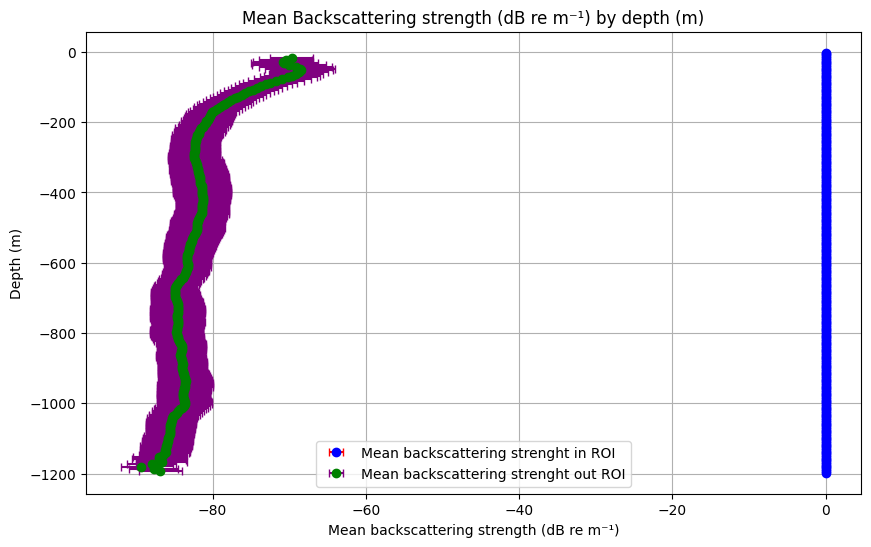

In [7]:
d, in_ROI, out_ROI = get_mean_var_in_out_ROI("/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen2/filtered_bathymetry/by_season/by_periods/summer/by_date/IMOS_18kHz_filtered_bathymetry_summer_night_by_date.pkl")
boxplot_mean_std(d, in_ROI, out_ROI)

In [2]:
path_gebco = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/bathymetry/GEBCO_10_Mar_2025_5906cede0691/gebco_2024_n-9.7048_s-70.5215_w58.714_e133.1174.nc"
path = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen2/filtered_bathymetry/by_season/by_periods/summer/by_date/IMOS_18kHz_filtered_bathymetry_summer_night_by_date.pkl"
src_path = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen2/IMOS_18kHz.pkl"
dest_path = "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen2/filtered_bath_GEBCO"

hey
Enf of file
/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/figures/gen3_data/trajectories_by_season/with_bath_filter_2500/_trajectoriesIMOS_18kHz_summer_bath.png


<Figure size 640x480 with 0 Axes>

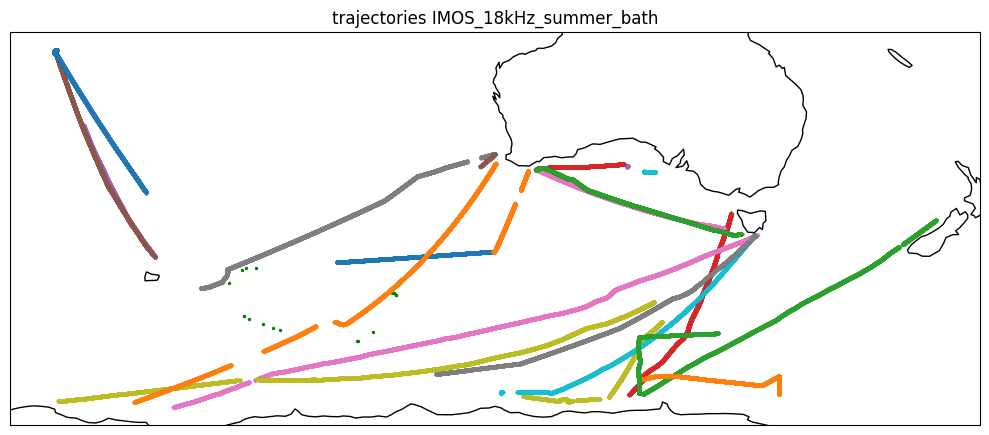

In [38]:
display_all_trajectories_folder("/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18kHz/processed_data_gen3/by_season/by_seasons_filtered_bath_2500/IMOS_18kHz_summer_bath.pkl", "true", "/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/figures/gen3_data/trajectories_by_season/with_bath_filter_2500/")

In [40]:

gebco = xr.open_dataset(path_gebco)

# Extraire les variables
bathymetry = gebco["elevation"].values  # Bathymétrie en mètres
latitudes = gebco["lat"].values  # Latitudes
longitudes = gebco["lon"].values  # Longitudes

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(10, 6))

# Ajouter la bathymétrie sous forme d'image avec un colormap adapté
plt.pcolormesh(longitudes, latitudes, bathymetry, cmap="Blues", shading="auto")

# Ajouter les côtes, frontières et grid
ax.coastlines()
# ax.add_feature(cartopy.feature.BORDERS, linestyle=":")
ax.gridlines(draw_labels=True, linestyle="--", color="gray")

# Ajouter une barre de couleur
cbar = plt.colorbar(label="Profondeur (m)")
plt.title("Carte de la bathymétrie (GEBCO)")
plt.show()

: 